In [3]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

from ssl_wafermap.models.knn import BYOL, SimSiam
from ssl_wafermap.utilities.transforms import get_inference_transforms

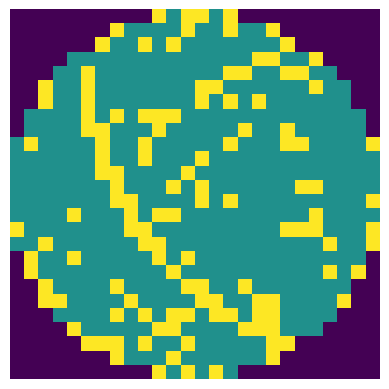

In [8]:
df = pd.read_pickle("../data/processed/WM811K/train_data.pkl.xz")
# Select a random wafer with the "Scratch" failureType
random_img = df.loc[df.failureType == "Scratch"].waferMap.sample().values[0]

save_dir = "../reports/figures/activations"
os.makedirs(save_dir, exist_ok=True)

# Plot and save the original wafer
plt.imshow(random_img, cmap="viridis", aspect=random_img.shape[1] / random_img.shape[0])
plt.axis("off")
plt.savefig(f"{save_dir}/original.png", bbox_inches="tight")
plt.show()

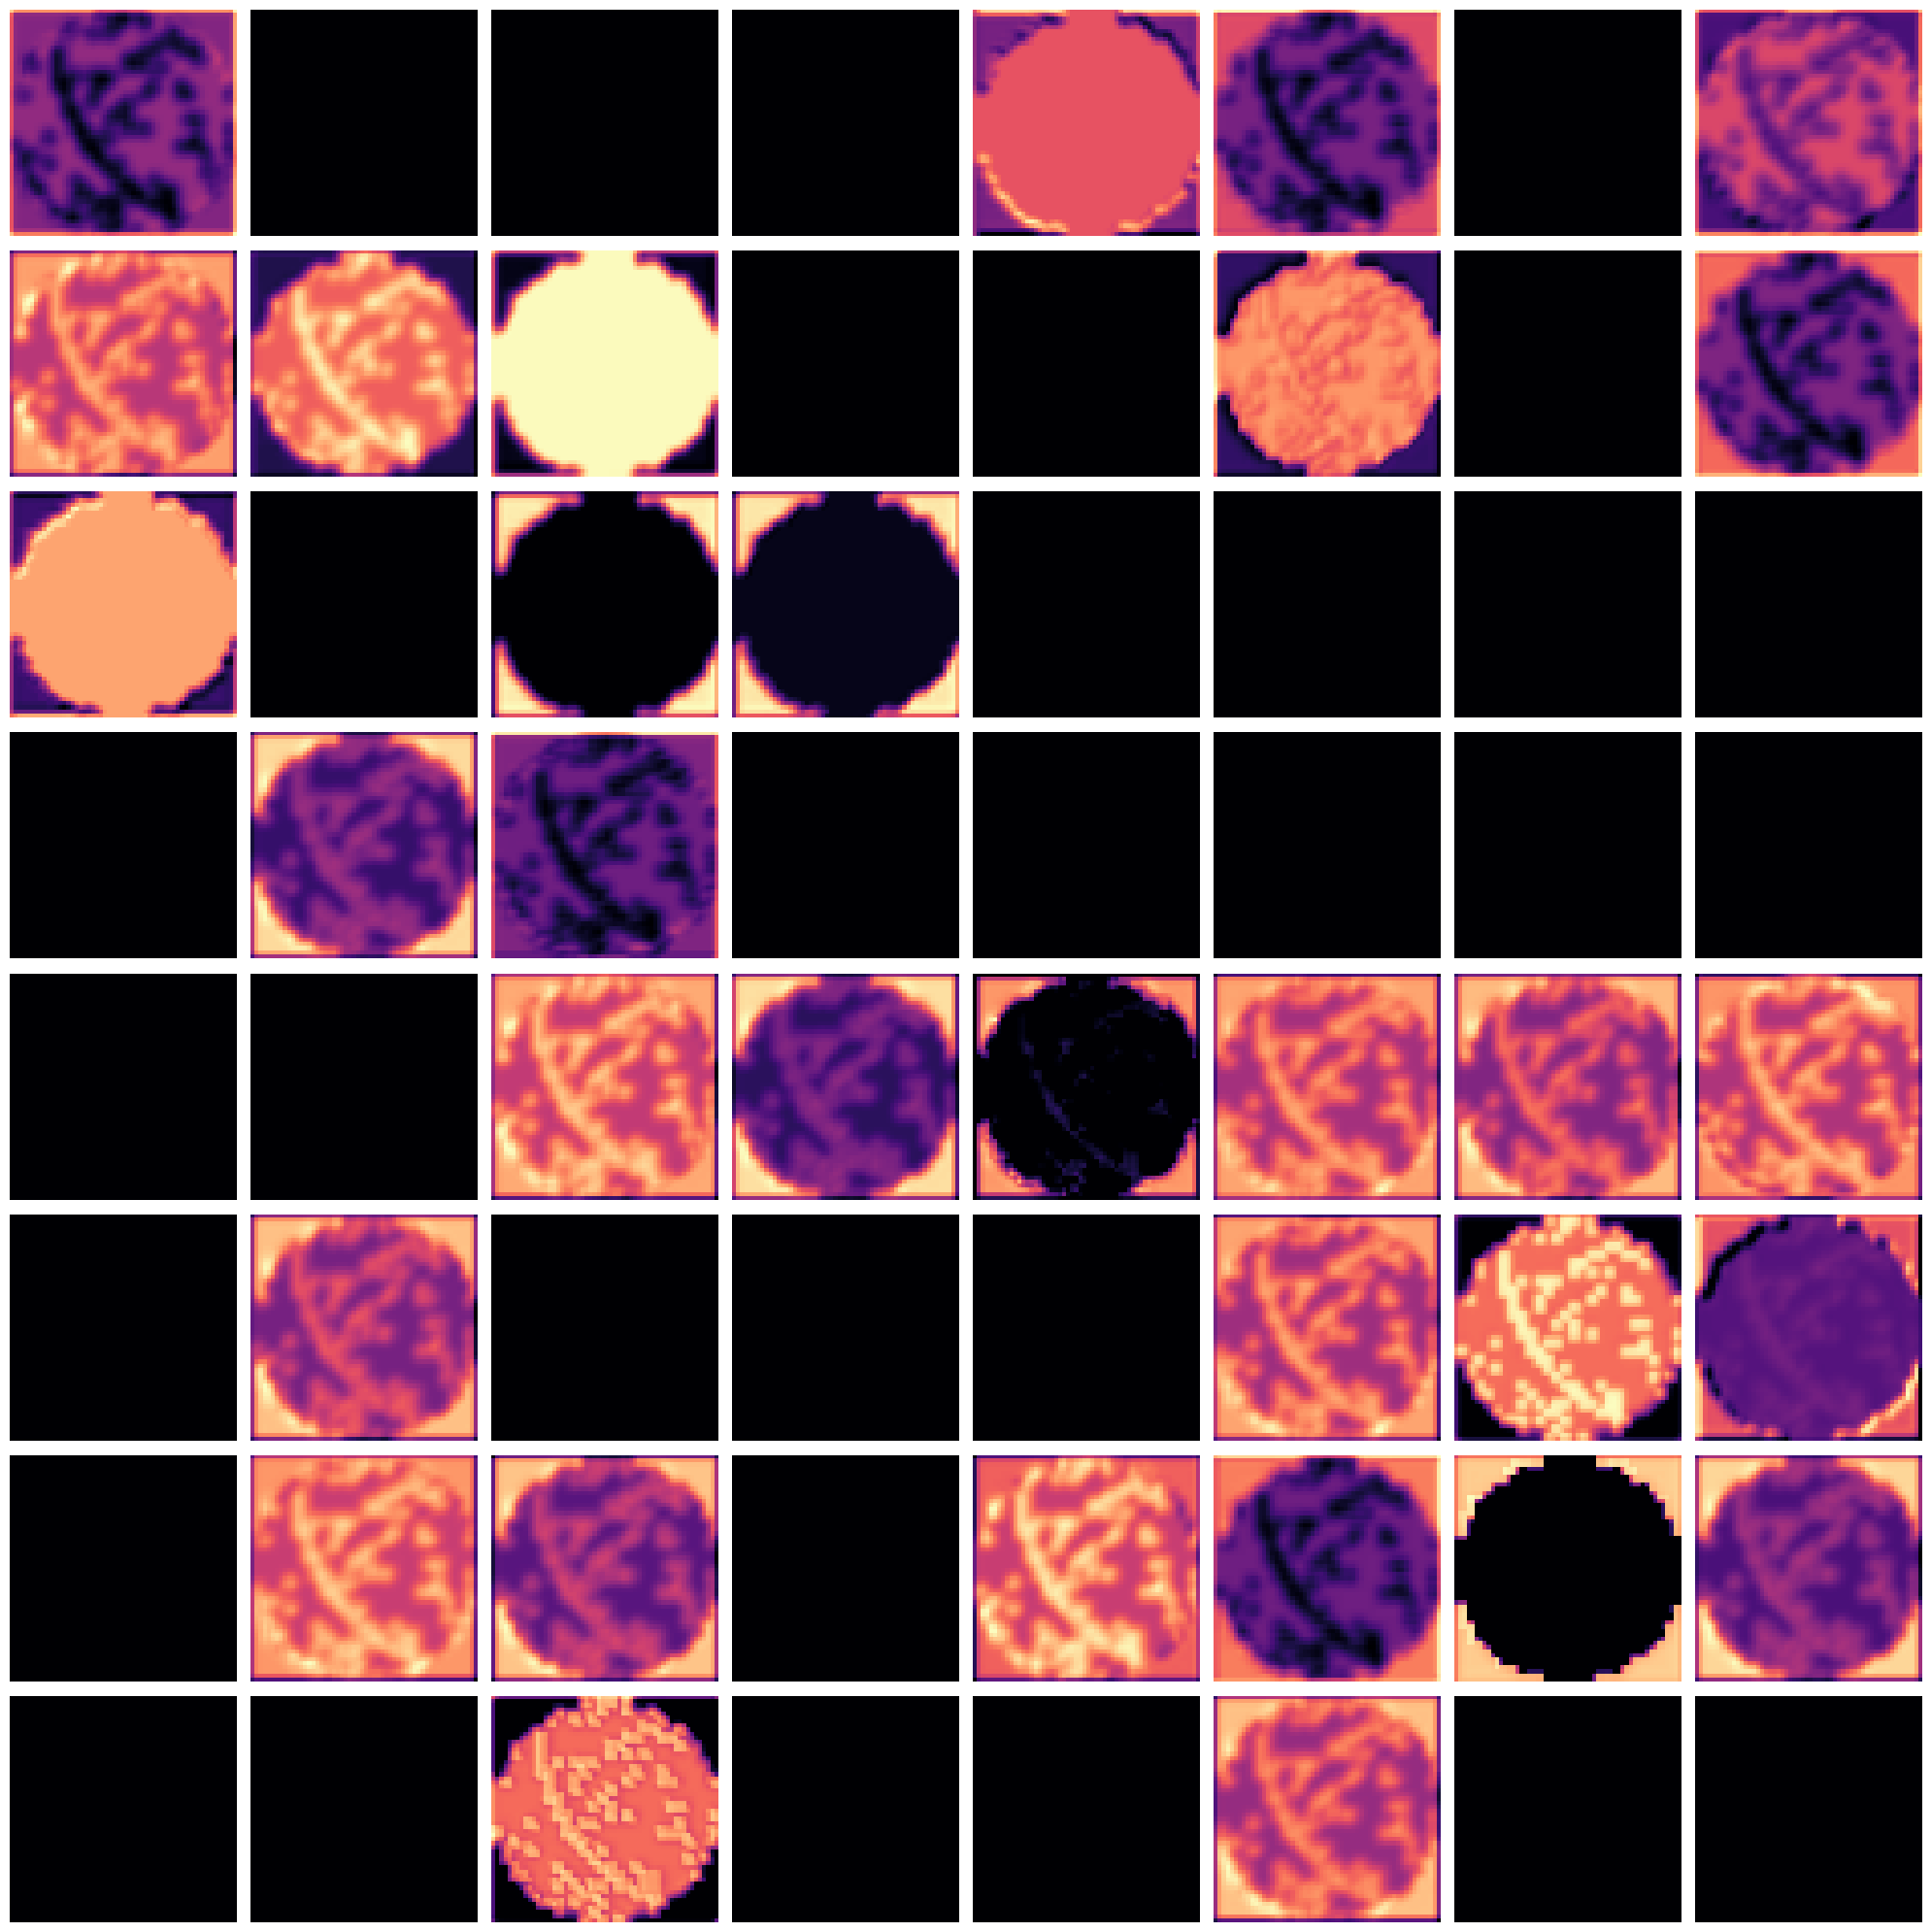

In [12]:
model = SimSiam.load_from_checkpoint("../models/new_knn/SimSiam/checkpoints/epoch=149-step=87450.ckpt")
model.eval()
model.cpu()

backbone = model.backbone

# Define a hook function to save the feature activations from the last convolutional layer
features = None
def hook(module, input, output):
    global features
    features = output

# Register the hook function to a convolutional layer
backbone.layer1.register_forward_hook(hook)

# Transform the image to a tensor
transforms = get_inference_transforms()
tensor = transforms(random_img).unsqueeze(0)

# Forward pass the input image through the model
with torch.no_grad():
    output = backbone(tensor)

# Retrieve the feature activations from the hook function
activations = features.squeeze(0).cpu()

# Plot the feature activations
fig, axs = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(activations[i], cmap='magma')
    ax.axis('off')

plt.tight_layout()
plt.savefig(f"{save_dir}/SimSiam-layer1.png", bbox_inches="tight")
plt.show()

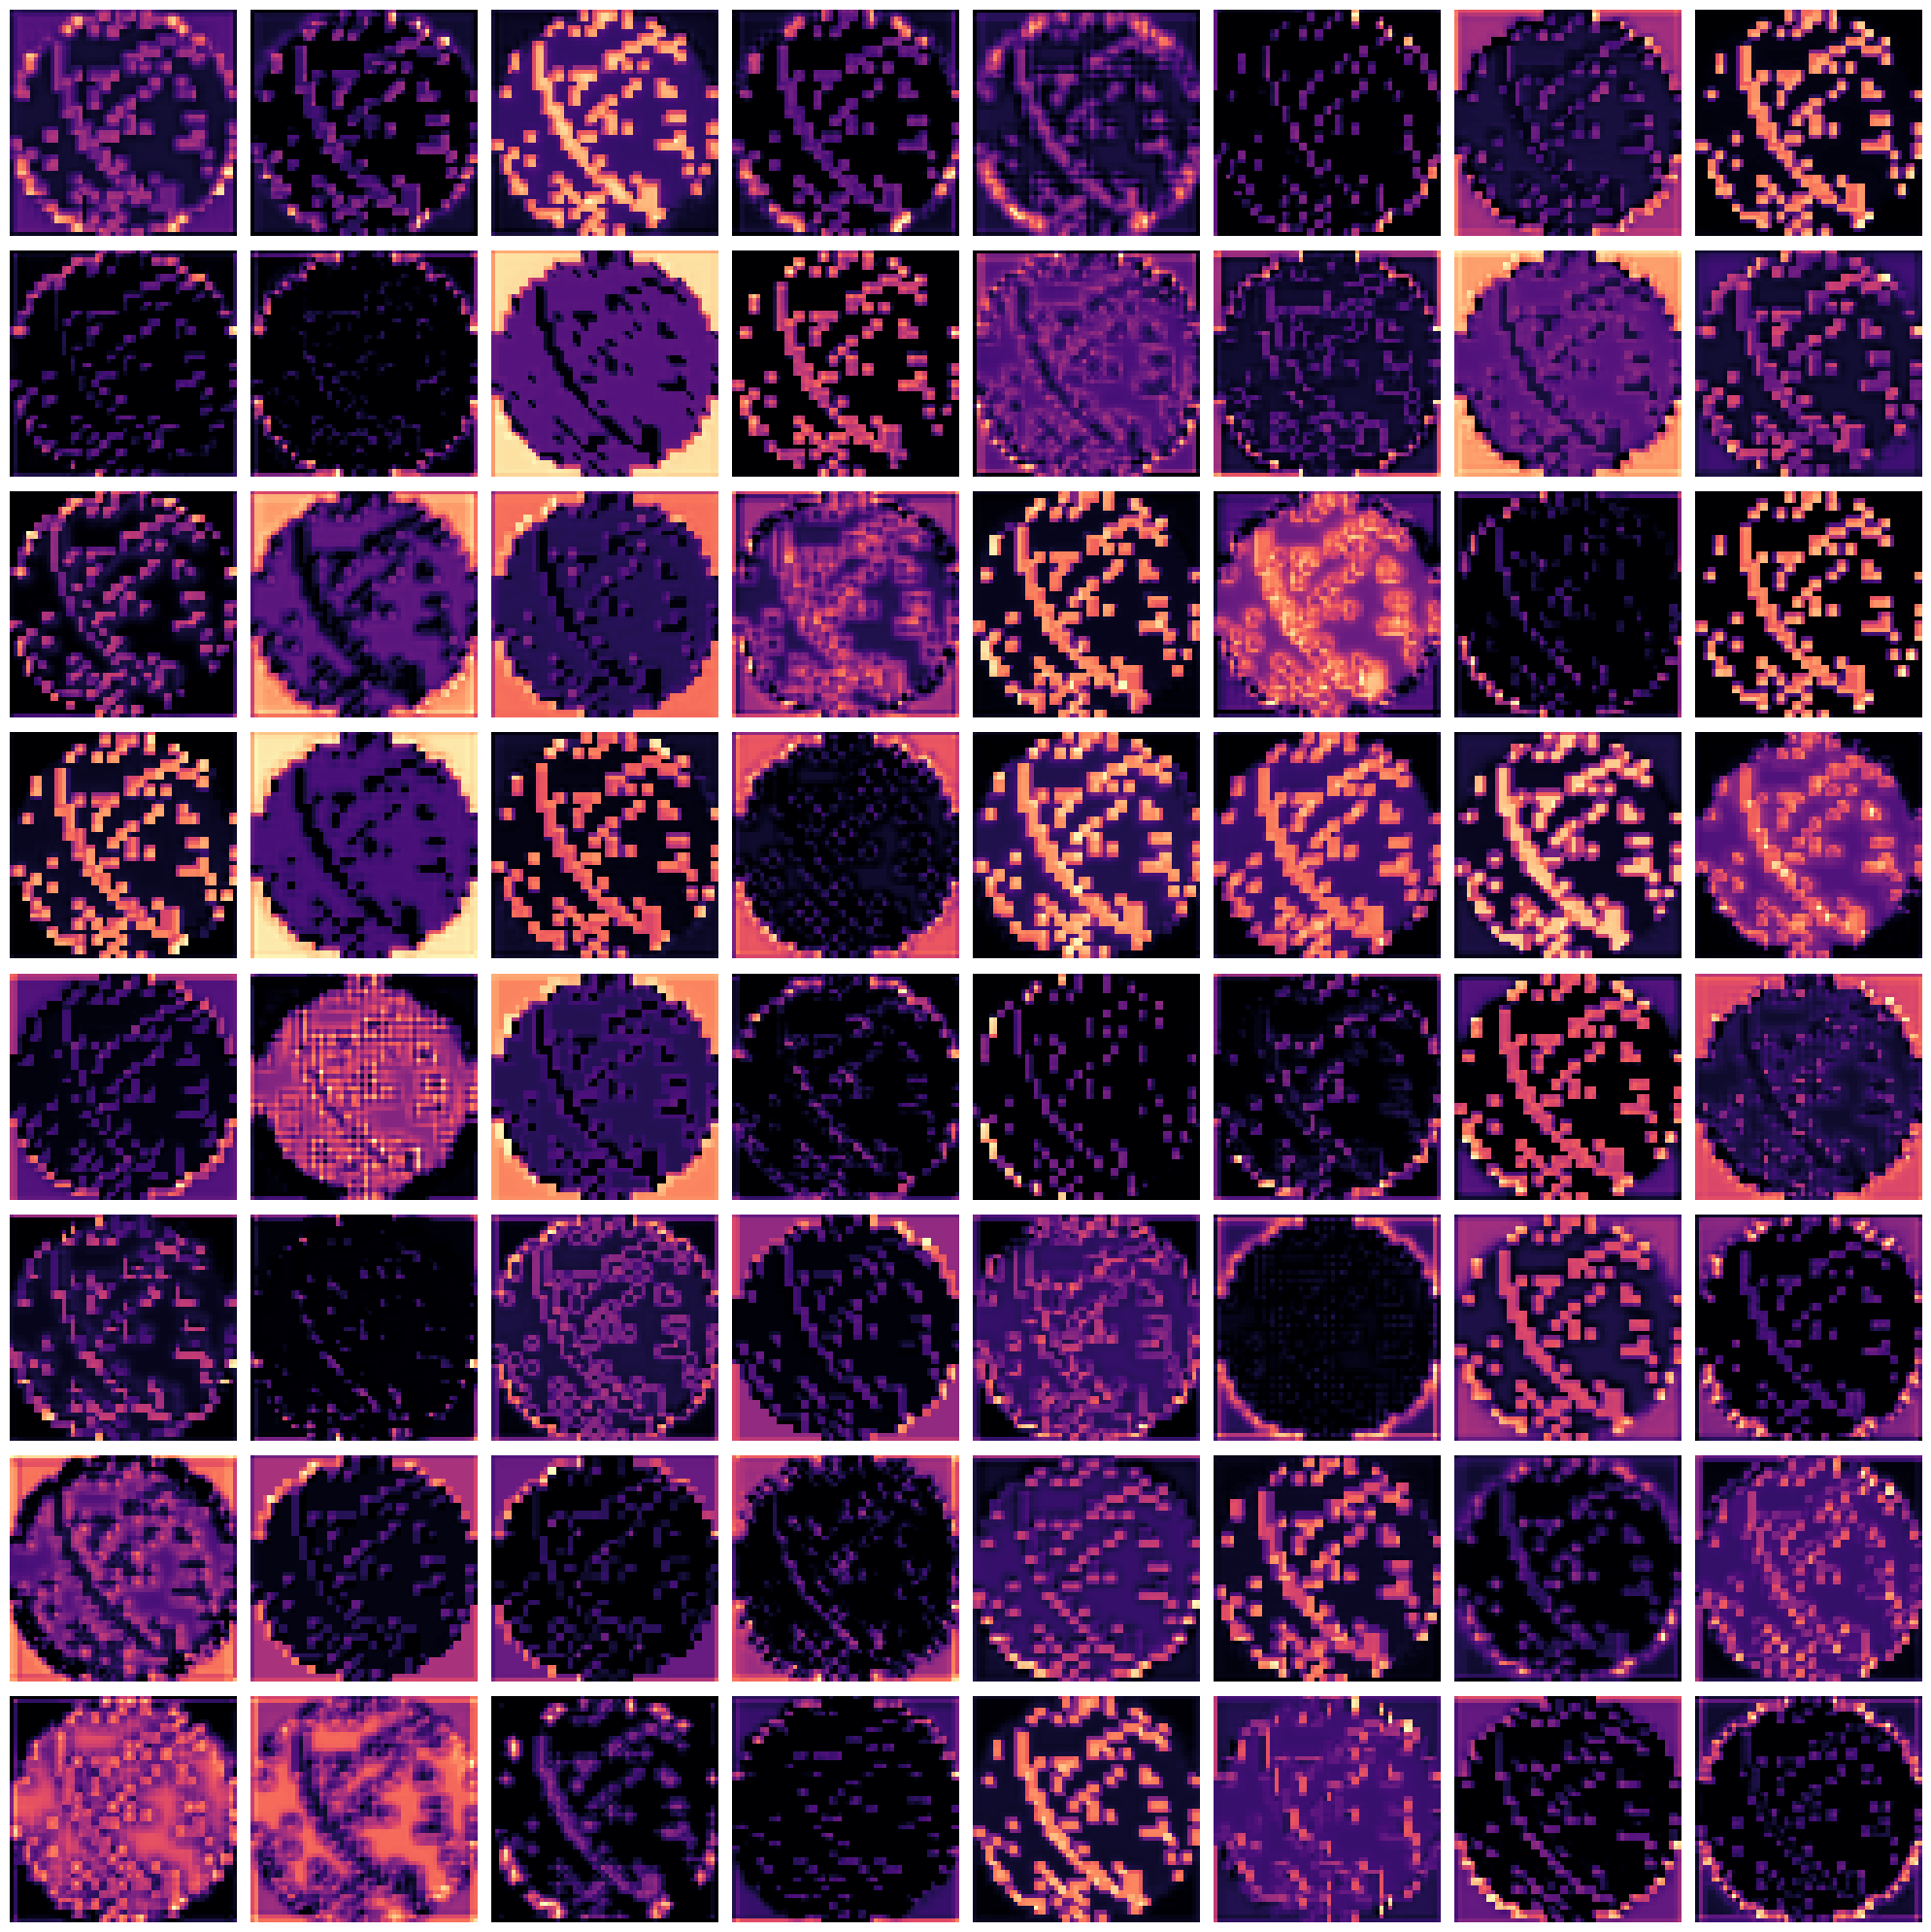

In [11]:
model = BYOL.load_from_checkpoint("../models/new_knn/BYOL/checkpoints/epoch=149-step=87450.ckpt")
model.eval()
model.cpu()

backbone = model.backbone

# Define a hook function to save the feature activations from the last convolutional layer
features = None
def hook(module, input, output):
    global features
    features = output

# Register the hook function to a convolutional layer
backbone.layer1.register_forward_hook(hook)

# Transform the image to a tensor
transforms = get_inference_transforms()
tensor = transforms(random_img).unsqueeze(0)

# Forward pass the input image through the model
with torch.no_grad():
    output = backbone(tensor)

# Retrieve the feature activations from the hook function
activations = features.squeeze(0).cpu()

# Plot the feature activations
fig, axs = plt.subplots(8, 8, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(activations[i], cmap='magma')
    ax.axis('off')

plt.tight_layout()
plt.savefig(f"{save_dir}/BYOL-layer1.png", bbox_inches="tight")
plt.show()